In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Data Preprocessing

In [ ]:
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/Cse498R.csv")


In [ ]:
data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [ ]:
X = data.drop(columns=['Bankrupt?']).values
y = data['Bankrupt?'].values

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:

model_dense = Sequential()
model_dense.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dense(1, activation='sigmoid'))


model_dense.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history_dense = model_dense.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

train_loss_dense, train_acc_dense = model_dense.evaluate(X_train_smote, y_train_smote, verbose=0)
val_loss_dense, val_acc_dense = model_dense.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
264/264 [==============================] - 4s 6ms/step - loss: 0.2775 - accuracy: 0.8902 - val_loss: 0.3001 - val_accuracy: 0.8939
Epoch 2/50
264/264 [==============================] - 1s 4ms/step - loss: 0.1844 - accuracy: 0.9286 - val_loss: 0.2330 - val_accuracy: 0.9228
Epoch 3/50
264/264 [==============================] - 1s 4ms/step - loss: 0.1411 - accuracy: 0.9490 - val_loss: 0.1409 - val_accuracy: 0.9598
Epoch 4/50
264/264 [==============================] - 1s 3ms/step - loss: 0.1091 - accuracy: 0.9627 - val_loss: 0.1072 - val_accuracy: 0.9811
Epoch 5/50
264/264 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9763 - val_loss: 0.0511 - val_accuracy: 0.9967
Epoch 6/50
264/264 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9818 - val_loss: 0.0843 - val_accuracy: 0.9853
Epoch 7/50
264/264 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9872 - val_loss: 0.0662 - val_accuracy: 0.9920
Epoch 

In [ ]:

X_train_smote_cnn = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_smote.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history_cnn = model_cnn.fit(X_train_smote_cnn, y_train_smote, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


train_loss_cnn, train_acc_cnn = model_cnn.evaluate(X_train_smote_cnn, y_train_smote, verbose=0)
val_loss_cnn, val_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)

Epoch 1/50
264/264 [==============================] - 3s 8ms/step - loss: 0.2763 - accuracy: 0.8854 - val_loss: 0.4085 - val_accuracy: 0.8286
Epoch 2/50
264/264 [==============================] - 2s 9ms/step - loss: 0.2118 - accuracy: 0.9165 - val_loss: 0.2774 - val_accuracy: 0.9039
Epoch 3/50
264/264 [==============================] - 2s 6ms/step - loss: 0.1862 - accuracy: 0.9278 - val_loss: 0.1599 - val_accuracy: 0.9545
Epoch 4/50
264/264 [==============================] - 1s 5ms/step - loss: 0.1640 - accuracy: 0.9358 - val_loss: 0.1977 - val_accuracy: 0.9323
Epoch 5/50
264/264 [==============================] - 1s 5ms/step - loss: 0.1435 - accuracy: 0.9448 - val_loss: 0.0899 - val_accuracy: 0.9825
Epoch 6/50
264/264 [==============================] - 1s 5ms/step - loss: 0.1212 - accuracy: 0.9575 - val_loss: 0.0641 - val_accuracy: 0.9896
Epoch 7/50
264/264 [==============================] - 1s 5ms/step - loss: 0.1026 - accuracy: 0.9629 - val_loss: 0.0707 - val_accuracy: 0.9867
Epoch 

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(X_train_smote.shape[1], 1), return_sequences=True))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(1, activation='sigmoid'))


model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history_lstm = model_lstm.fit(X_train_smote_cnn, y_train_smote, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


train_loss_lstm, train_acc_lstm = model_lstm.evaluate(X_train_smote_cnn, y_train_smote, verbose=0)
val_loss_lstm, val_acc_lstm = model_lstm.evaluate(X_test_cnn, y_test, verbose=0)


Epoch 1/50
264/264 [==============================] - 34s 111ms/step - loss: 0.4859 - accuracy: 0.7808 - val_loss: 0.6397 - val_accuracy: 0.8333
Epoch 2/50
264/264 [==============================] - 26s 98ms/step - loss: 0.4293 - accuracy: 0.8301 - val_loss: 0.6613 - val_accuracy: 0.8490
Epoch 3/50
264/264 [==============================] - 21s 78ms/step - loss: 0.4259 - accuracy: 0.8294 - val_loss: 0.6622 - val_accuracy: 0.8040
Epoch 4/50
264/264 [==============================] - 20s 75ms/step - loss: 0.4199 - accuracy: 0.8351 - val_loss: 0.6097 - val_accuracy: 0.8021
Epoch 5/50
264/264 [==============================] - 21s 79ms/step - loss: 0.4067 - accuracy: 0.8348 - val_loss: 0.5616 - val_accuracy: 0.7992
Epoch 6/50
264/264 [==============================] - 21s 78ms/step - loss: 0.3830 - accuracy: 0.8403 - val_loss: 0.5734 - val_accuracy: 0.7940
Epoch 7/50
264/264 [==============================] - 20s 78ms/step - loss: 0.3534 - accuracy: 0.8501 - val_loss: 0.4523 - val_accuracy

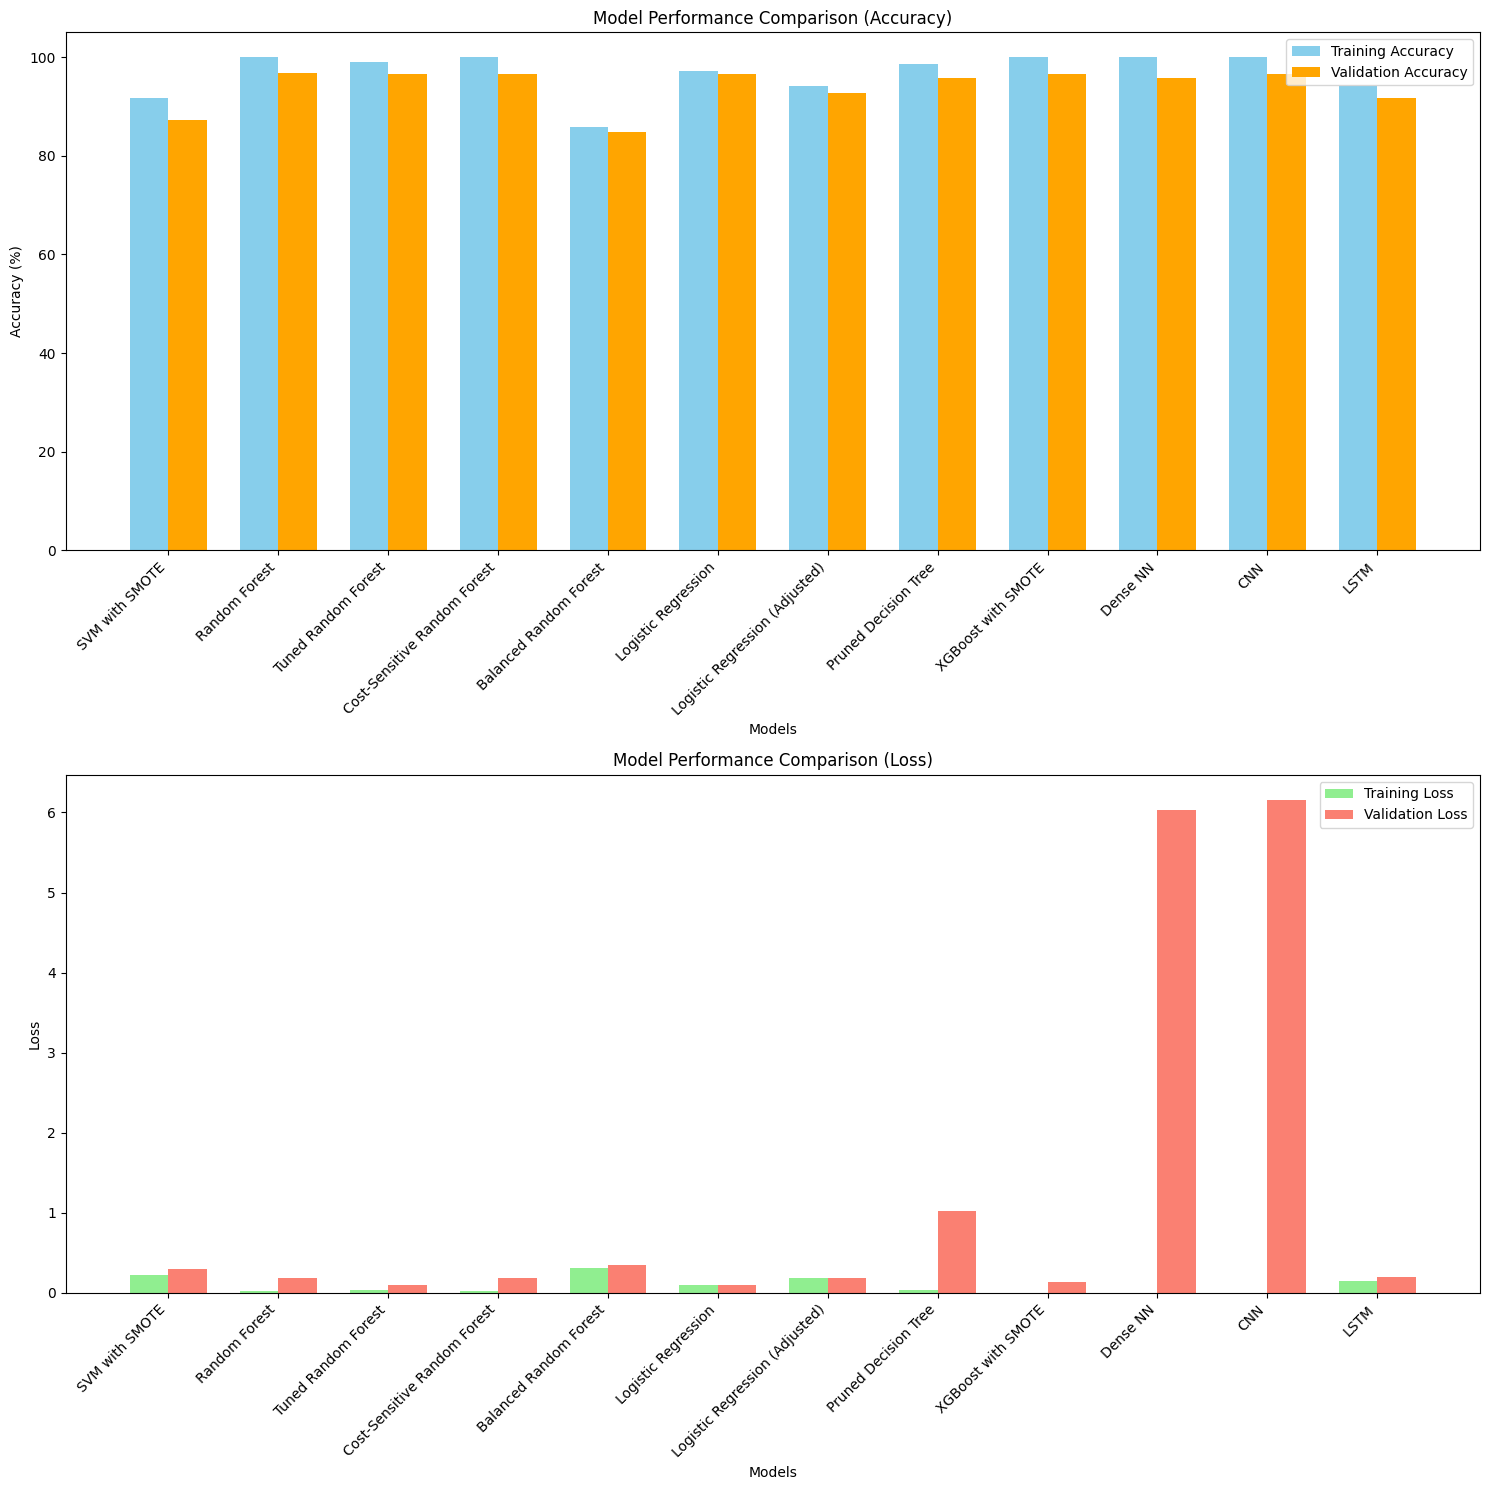

In [ ]:

model_names = ['SVM with SMOTE', 'Random Forest', 'Tuned Random Forest', 'Cost-Sensitive Random Forest',
               'Balanced Random Forest', 'Logistic Regression', 'Logistic Regression (Adjusted)',
               'Pruned Decision Tree', 'XGBoost with SMOTE', 'Dense NN', 'CNN', 'LSTM']

training_accuracies = [91.62, 100, 99.03, 100, 85.74, 97.10, 94.08, 98.61, 100, train_acc_dense*100, train_acc_cnn*100, train_acc_lstm*100]
validation_accuracies = [87.32, 96.77, 96.63, 96.63, 84.82, 96.63, 92.74, 95.82, 96.63, val_acc_dense*100, val_acc_cnn*100, val_acc_lstm*100]
training_losses = [0.230, 0.019, 0.033, 0.019, 0.315, 0.094, 0.184, 0.031, 0.001, train_loss_dense, train_loss_cnn, train_loss_lstm]
validation_losses = [0.293, 0.184, 0.095, 0.187, 0.346, 0.103, 0.189, 1.019, 0.132, val_loss_dense, val_loss_cnn, val_loss_lstm]


import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

x = np.arange(len(model_names))


bar_width = 0.35
ax[0].bar(x - bar_width/2, training_accuracies, bar_width, label='Training Accuracy', color='skyblue')
ax[0].bar(x + bar_width/2, validation_accuracies, bar_width, label='Validation Accuracy', color='orange')

ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_title('Model Performance Comparison (Accuracy)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names, rotation=45, ha='right')
ax[0].legend()


ax[1].bar(x - bar_width/2, training_losses, bar_width, label='Training Loss', color='lightgreen')
ax[1].bar(x + bar_width/2, validation_losses, bar_width, label='Validation Loss', color='salmon')

ax[1].set_xlabel('Models')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Performance Comparison (Loss)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names, rotation=45, ha='right')
ax[1].legend()

plt.tight_layout()
plt.show()
